In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as rc
import copy
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
plt.rc('font',family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 주식데이터

In [5]:
# 데이터 불러오기
stock_1904 = pd.read_csv('/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/SBCN/주식일간기본지표_201904.csv',sep = ',',encoding='CP949')
stock_1905 = pd.read_csv('/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/SBCN/주식일간기본지표_201905.csv',sep = ',',encoding='CP949')
stock_2004 = pd.read_csv('/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/SBCN/주식일간기본지표_202004.csv',sep = ',',encoding='CP949')

In [6]:
# 불필요하다고 판단되는 feature drop
stock_1904.drop(['실배당수익율','주식종목값','적재일시','센터코드'],axis = 1,inplace = True)
stock_1905.drop(['실배당수익율','주식종목값','적재일시','센터코드'],axis = 1,inplace = True)
stock_2004.drop(['실배당수익율','주식종목값','적재일시','센터코드'],axis = 1,inplace = True)

In [7]:
# nan 값 확인
print(stock_1904.isna().sum(),'\n\n\n',stock_1905.isna().sum(),'\n\n\n',stock_2004.isna().sum())

기준일자             0
주식종목명            0
주가순자산비율         23
주가수익비율          23
주가현금흐름비율        23
주가매출비율          23
매출액대비기업가치비율     22
세전이익대비기업가치비율    22
우편번호            23
dtype: int64 


 기준일자             0
주식종목명            0
주가순자산비율         21
주가수익비율          21
주가현금흐름비율        21
주가매출비율          21
매출액대비기업가치비율     21
세전이익대비기업가치비율    21
우편번호            21
dtype: int64 


 기준일자               0
주식종목명              0
주가순자산비율            0
주가수익비율             0
주가현금흐름비율           0
주가매출비율           684
매출액대비기업가치비율      684
세전이익대비기업가치비율       0
우편번호            1102
dtype: int64


> stock_1904,stock_1905 에서 주식이름만 있고 그 외 수치가 모두 존재하지 않는 값은 무의미하다고 판단 > drop

> stock_2004데이터의 4만개 중 684개의 데이터가 유의미 할 수 있지만, 필요시 다시 불러오고 > drop

In [8]:
# drop값 날리기
stock_1904.dropna(inplace = True)
stock_1905.dropna(inplace = True)
stock_2004.dropna(inplace = True)

### 종목이 다르기 때문에 19년도 데이터와 20년도 데이터를 merge 하기에는 애매함

In [9]:
for i in stock_1904['주식종목명'].unique().tolist():
    if i not in stock_2004['주식종목명'].unique().tolist():
        print('19.04에 있는 종목이 20.04에 있는 종목과 다른게 존재 합니다')
        break

19.04에 있는 종목이 20.04에 있는 종목과 다른게 존재 합니다


In [10]:
for i in stock_1904['주식종목명'].unique().tolist():
    if i not in stock_1905['주식종목명'].unique().tolist():
        print('19.04에 있는 종목이 19.05에 있는 종목과 다른게 존재 합니다')
        break
    else:
        print('19.04와 19.05의 종목은 모두 동일 합니다')
        break

19.04와 19.05의 종목은 모두 동일 합니다


In [11]:
for i in stock_2004['주식종목명'].unique().tolist():
    if i not in stock_1904['주식종목명'].unique().tolist():
        print('20.04에 있는 종목이 19.04에 있는 종목과 다른게 존재 합니다')
        break

20.04에 있는 종목이 19.04에 있는 종목과 다른게 존재 합니다


In [12]:
# 주식종목명, 기준일자 feature를 기준으로 데이터들을 모두 평균값을 내주고 재정렬(모두 비율 수치이기 때문에 mean() 이용)
stock_1904 = stock_1904.groupby(['주식종목명','기준일자']).mean().reset_index()
stock_1905 = stock_1905.groupby(['주식종목명','기준일자']).mean().reset_index()
stock_2004 = stock_2004.groupby(['주식종목명','기준일자']).mean().reset_index()

### feature 값 정의서
> 주가 : 배당금 / 이자율

> 주당순자산가치(BPS) : (총 자산 - 부채) / 발행주식 수  =  순자산 / 발행주식 수             >>  기업이 활동을 중단한 뒤 그 자산을 모든 주주들에게 나눠줄 경우 1주당 얼마씩 배분되는가

> 주가순자산비율(PBR) : 주가 / 주당순자산가치                                          >>  1주당 순자산에 비해 주가가 얼마인지 알 수 있다.

> 주가수익비율 : 주가 / 주당순이익                                                   >>  현재 시장에서 매매되는 특정회사의 주식가격을 주당순이익으로 나눈 값

> 주가현금흐름비율 : 주가 / 주당현금흐름                                               >>  현 주가가 기업의 자금조달능력이나 순수영업성과에 비해 어떻게 평가되어 있는가를 판단하는 데 사용 가능하다.(낮을 수록 투자가치가 높다)

> 주가매출비율 : 주가 / 주당매출액                                                   >>  현재의 주가가 주당 매출액의 몇 배인가를 나타내는 수치이자 동시에 현재의 주가 수준에서 본 매출액 성장 여력의 기대치이다.(낮으면 저평가된 놈)

> 매출액대비기업가치비율 : 이곧내                                                     >>  야후, 구글 등이 3~5배 정도 된다.

> 세전이익대비기업가치비율 : 세전이익은 법인세 등을 공제하기 전의 이익이다. 나머진 이곧내           

> 우편번호 : 니가 도대체 왜 거기 있냐 쥰내 열받게

In [13]:
stock_1904

,주식종목명,기준일자,주가순자산비율,주가수익비율,주가현금흐름비율,주가매출비율,매출액대비기업가치비율,세전이익대비기업가치비율,우편번호
0,3S,20190401,3.10,75.52,37.33,2.98,3.15,50.00,8614.0
1,3S,20190403,3.10,75.52,37.33,2.98,3.15,50.00,8614.0
2,3S,20190405,3.08,75.04,37.09,2.96,3.13,49.70,8614.0
3,3S,20190408,3.12,75.99,37.56,3.00,3.17,50.30,8614.0
4,3S,20190410,3.17,77.26,38.19,3.05,3.22,51.10,8614.0
...,...,...,...,...,...,...,...,...,...
19972,희림,20190422,1.28,16.73,5.25,0.39,0.47,9.38,5288.0
19973,희림,20190424,1.28,16.75,5.25,0.39,0.47,9.39,5288.0
19974,희림,20190425,1.25,16.32,5.12,0.38,0.46,9.19,5288.0
19975,희림,20190426,1.23,16.10,5.05,0.38,0.45,9.08,5288.0


### 중요특성별 상관계수 scatter matrix & 상관계수 수치

In [14]:
feature_importance_1904 = stock_1904[stock_1904.columns[2:8]]
feature_importance_1905 = stock_1905[stock_1905.columns[2:8]]
feature_importance_2004 = stock_2004[stock_2004.columns[2:8]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93a5954ac8>,
      dtype=object)

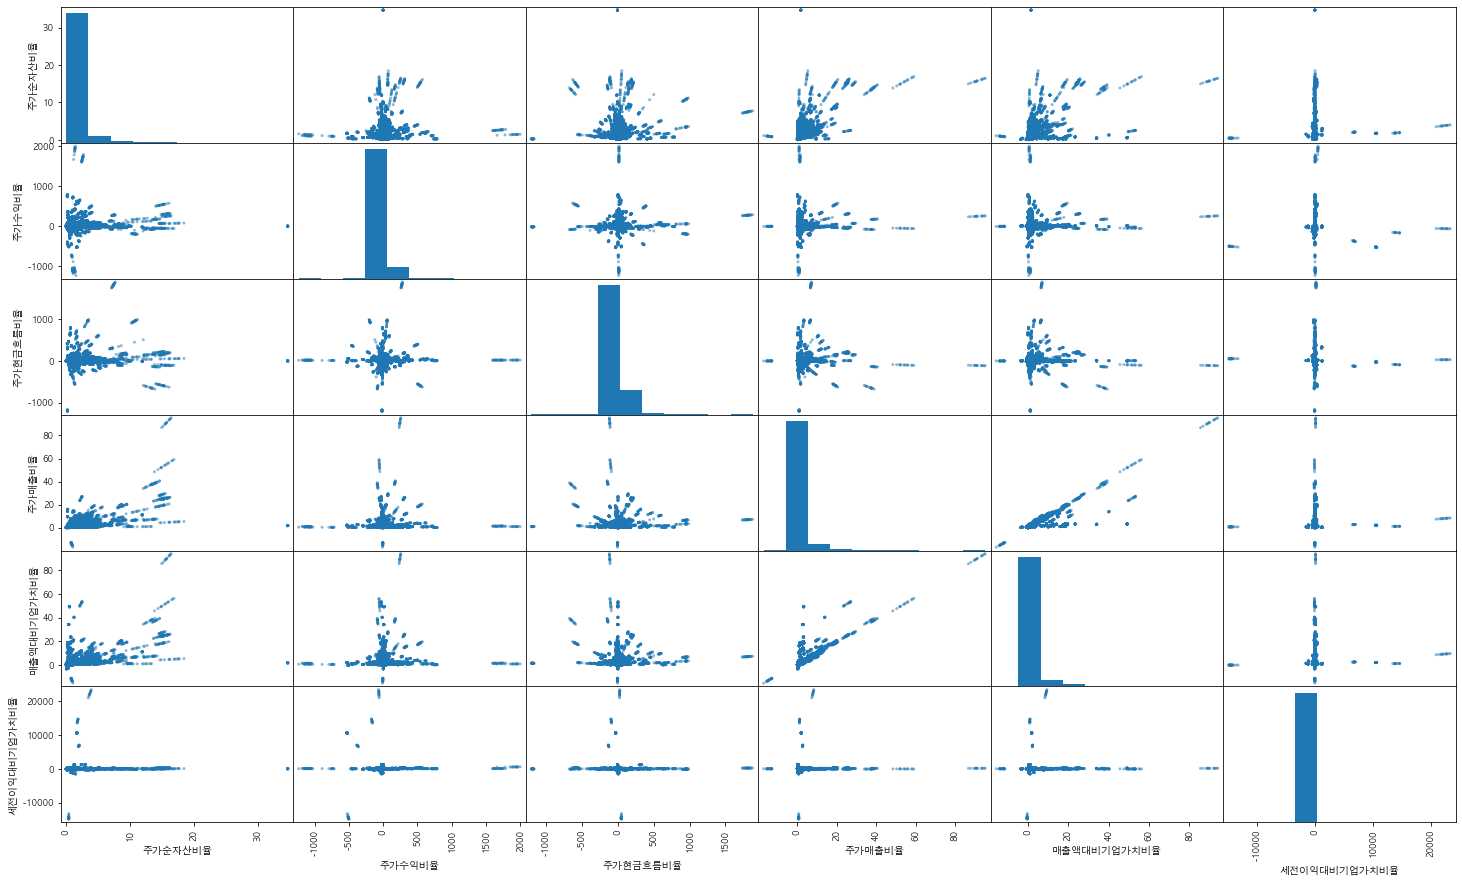

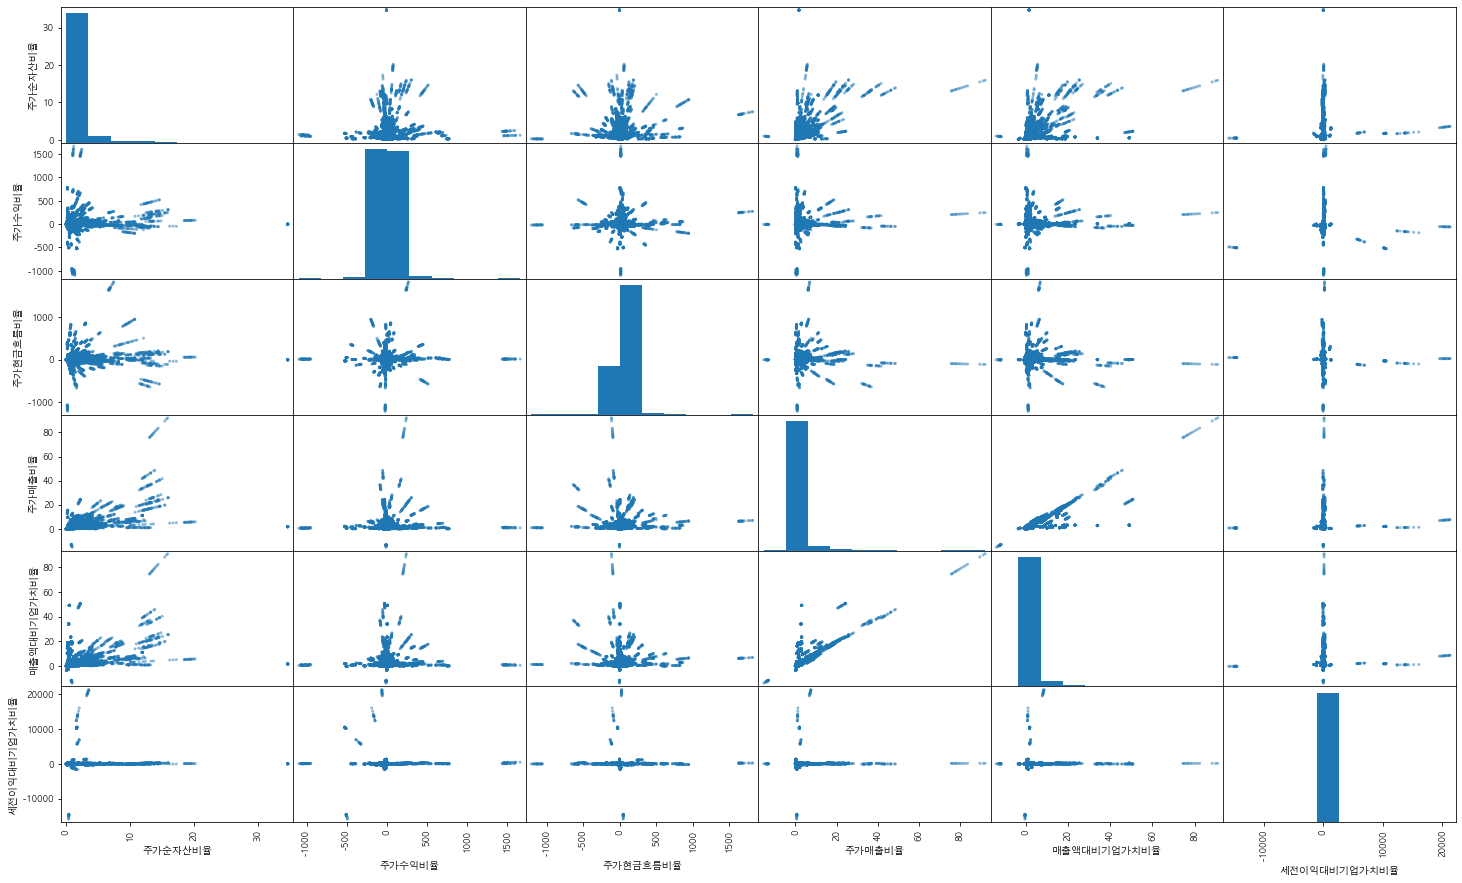

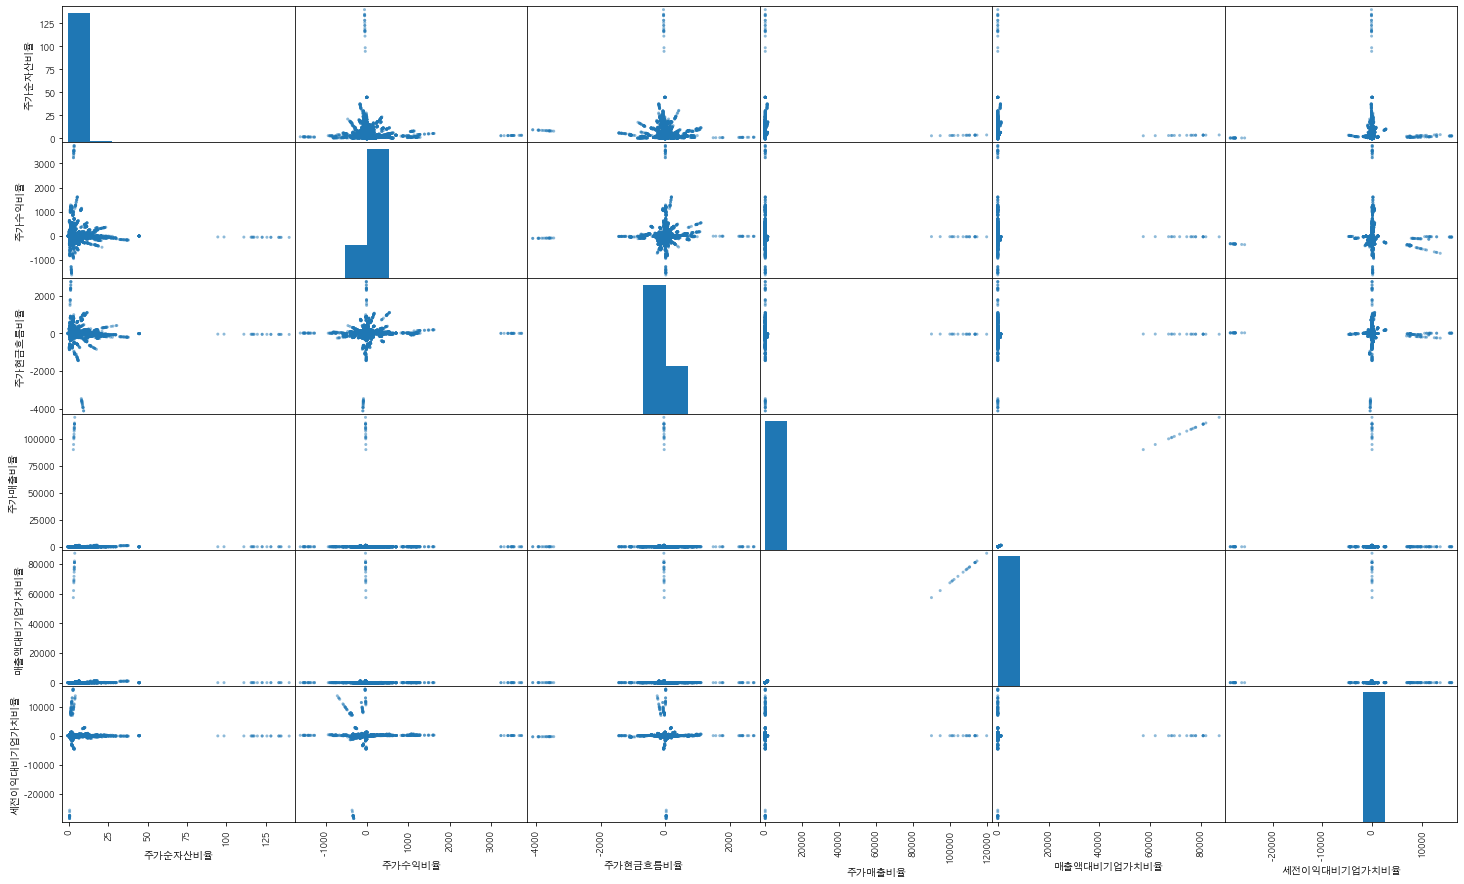

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(feature_importance_1904,figsize = (25,15))
scatter_matrix(feature_importance_1905,figsize = (25,15))
scatter_matrix(feature_importance_2004,figsize = (25,15))

In [16]:
corr_matrix_1904 = feature_importance_1904.corr()
corr_matrix_1905 = feature_importance_1905.corr()
corr_matrix_2004 = feature_importance_2004.corr()
corr_matrix_1904

,주가순자산비율,주가수익비율,주가현금흐름비율,주가매출비율,매출액대비기업가치비율,세전이익대비기업가치비율
주가순자산비율,1.000000,0.087263,0.093784,0.592655,0.436636,0.035571
주가수익비율,0.087263,1.000000,0.033384,0.064566,0.045050,-0.005609
주가현금흐름비율,0.093784,0.033384,1.000000,0.003767,-0.006989,-0.018598
주가매출비율,0.592655,0.064566,0.003767,1.000000,0.832001,0.032851
매출액대비기업가치비율,0.436636,0.045050,-0.006989,0.832001,1.000000,0.034448
세전이익대비기업가치비율,0.035571,-0.005609,-0.018598,0.032851,0.034448,1.000000


In [17]:
corr_matrix_1905

,주가순자산비율,주가수익비율,주가현금흐름비율,주가매출비율,매출액대비기업가치비율,세전이익대비기업가치비율
주가순자산비율,1.000000,0.080084,0.080021,0.565961,0.410496,0.031499
주가수익비율,0.080084,1.000000,0.037979,0.064288,0.044480,-0.005717
주가현금흐름비율,0.080021,0.037979,1.000000,-0.003224,-0.012772,-0.020975
주가매출비율,0.565961,0.064288,-0.003224,1.000000,0.823002,0.030589
매출액대비기업가치비율,0.410496,0.044480,-0.012772,0.823002,1.000000,0.032681
세전이익대비기업가치비율,0.031499,-0.005717,-0.020975,0.030589,0.032681,1.000000


In [18]:
corr_matrix_2004

,주가순자산비율,주가수익비율,주가현금흐름비율,주가매출비율,매출액대비기업가치비율,세전이익대비기업가치비율
주가순자산비율,1.000000,-0.006055,-0.045618,0.012845,0.014587,0.004027
주가수익비율,-0.006055,1.000000,0.055494,-0.008644,-0.008881,0.011801
주가현금흐름비율,-0.045618,0.055494,1.000000,-0.007738,-0.008043,0.000085
주가매출비율,0.012845,-0.008644,-0.007738,1.000000,0.999531,-0.000931
매출액대비기업가치비율,0.014587,-0.008881,-0.008043,0.999531,1.000000,-0.000934
세전이익대비기업가치비율,0.004027,0.011801,0.000085,-0.000931,-0.000934,1.000000


위 feature 별 상관관계 sctter matrix와 상관계수 도표를 통해 주가매출비율, 매출액대비기업가치비율을 제외하면 각각 독립적인 수치를 통해 측정되는 feature 로 추측됨

# issue 데이터

In [19]:
issue = pd.read_csv('/Users/jaeyoungcho/Desktop/2020 금융 빅데이터 챌린지-공모전데이터/데이터/SBCN/이슈지표.csv',sep = ',',encoding='CP949')

issue.drop(['주식종목값','적재일시','센터코드','우편번호'],axis = 1, inplace = True)

issue.sort_values('기준일자',inplace = True)
issue.reset_index(drop = True,inplace = True)

In [20]:
issue

,기준일자,주식종목명,이슈내용,이슈분류이용문서수
0,20190401,효성중공업,"[{'words': ['중공업', '부문', '대표', '시장', '효성', '기자...",6
1,20190401,삼광글라스,"[{'words': ['글라스', '있', '제품', '용기', '삼광', '유리'...",22
2,20190401,오션브릿지,"[{'words': ['브릿지', '오션', '경제', '계약', '한국', '언론...",10
3,20190401,한솔제지,"[{'words': ['한솔제지', '있', '인수', '태림', '헤럴드', '경...",8
4,20190401,나노메딕스,"[{'words': ['딕스', '메', '나노', '한국', '차트', '한경',...",6
...,...,...,...,...
60607,20200529,엠아이텍,"[{'words': ['엠아이', '텍', 'FDA', '제품', '트', '스텐'...",5
60608,20200529,SKC코오롱PI,"[{'words': ['M', '기업', '전략', '증권', 'A', '시장', ...",13
60609,20200529,아이큐어,"[{'words': ['임상', '치매', '패치', '도네', '큐어', '상',...",6
60610,20200529,코스맥스,"[{'words': ['맥스', '코스', '파운데이션', '트', '개발', 'D...",28


In [21]:
issue_2019 = issue.loc[issue['기준일자'] < 20200000]
issue_2020 = issue.loc[issue['기준일자'] > 20200000]

In [31]:
temp = issue_2019['이슈내용']

In [49]:
text = ' '.join(text_19[0])

In [50]:
text

"[ { ' w o r d s ' :   [ ' 중 공 업 ' ,   ' 부 문 ' ,   ' 대 표 ' ,   ' 시 장 ' ,   ' 효 성 ' ,   ' 기 자 ' ,   ' 언 론 사 ' ,   ' 투 자 ' ,   ' 요 코 타 ' ,   ' 타 케 시 ' ] ,   ' w o r d w e i g h t s ' :   [ 0 . 0 1 8 4 6 6 0 5 1 6 6 7 9 2 8 6 9 6 ,   0 . 0 1 5 1 2 8 5 2 3 1 1 1 3 4 3 3 8 4 ,   0 . 0 1 2 8 8 8 5 0 8 8 4 8 8 4 5 9 5 9 ,   0 . 0 1 0 6 3 2 7 7 5 7 2 3 9 3 4 1 7 4 ,   0 . 0 1 0 6 2 0 8 9 4 8 4 1 8 4 9 8 0 4 ,   0 . 0 0 9 5 1 8 8 1 9 8 6 1 1 1 4 0 2 5 ,   0 . 0 0 9 5 1 8 7 6 3 9 8 1 7 5 9 5 4 8 ,   0 . 0 0 9 5 1 3 6 4 0 7 7 6 2 7 6 5 8 8 ,   0 . 0 0 8 4 0 4 7 4 2 9 2 6 3 5 9 1 7 7 ,   0 . 0 0 8 4 0 4 5 8 6 4 6 4 1 6 6 6 4 1 ] } ,   { ' w o r d s ' :   [ ' 효 성 ' ,   ' 중 공 업 ' ,   ' 경 제 ' ,   ' 서 울 ' ,   ' 발 행 ' ,   ' 구 독 ' ,   ' 회 사 ' ,   ' 후 ' ,   ' 지 난 해 ' ,   ' 언 론 사 ' ] ,   ' w o r d w e i g h t s ' :   [ 0 . 0 3 7 9 9 5 9 4 9 3 8 7 5 5 0 3 5 4 ,   0 . 0 2 1 5 9 6 1 8 0 2 7 5 0 8 2 5 8 8 ,   0 . 0 1 2 6 6 9 4 7 4 8 1 7 8 1 2 4 4 3 ,   0 . 0 1 1 1 6 8 1 8 0 9 6 4 8 8 7 1 4 2 ,   0 . 0 0 8 1 9

In [30]:
text_19 = []
for i,v in temp.items():
    text_19.append(v)
text_19

["[{'words': ['중공업', '부문', '대표', '시장', '효성', '기자', '언론사', '투자', '요코타', '타케시'], 'wordweights': [0.018466051667928696, 0.015128523111343384, 0.012888508848845959, 0.010632775723934174, 0.010620894841849804, 0.009518819861114025, 0.009518763981759548, 0.009513640776276588, 0.008404742926359177, 0.008404586464166641]}, {'words': ['효성', '중공업', '경제', '서울', '발행', '구독', '회사', '후', '지난해', '언론사'], 'wordweights': [0.037995949387550354, 0.021596180275082588, 0.012669474817812443, 0.011168180964887142, 0.008190617896616459, 0.006706791929900646, 0.006705764215439558, 0.006703658495098352, 0.0067010424099862576, 0.006693890318274498]}]",
 "[{'words': ['글라스', '있', '제품', '용기', '삼광', '유리', '볶음밥', '락', '뚜껑', '이유식'], 'wordweights': [0.030867047607898712, 0.019585030153393745, 0.01586638204753399, 0.015150853432714939, 0.014028818346560001, 0.011545371264219284, 0.011168824508786201, 0.010852931067347527, 0.010228090919554234, 0.009789755567908287]}, {'words': ['글라스', '삼광', '있', '언론사', '몰', '경제', '경영', '공

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(issue_2019['이슈내용'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object